In [34]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df['Postal Code'] = df.groupby('City')['Postal Code'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


In [13]:
df["Order Date"] = pd.to_datetime(df["Order Date"],format="%d/%m/%Y")

In [14]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"],format="%d/%m/%Y")

In [25]:
# Order Date parts
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')  # e.g., "January"

# Ship Date parts
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Month Name'] = df['Ship Date'].dt.strftime('%B')

In [29]:
Total_sales = df["Sales"].sum()
print(Total_sales)

2261536.7827


In [30]:
Total_orders = df["Order ID"].nunique()
print(Total_orders)

4922


In [31]:
AverageOrderValue = Total_sales / Total_orders
print(AverageOrderValue)

459.4751691791954


In [32]:
sales_city = df.groupby("City")["Sales"].sum().reset_index()
print(sales_city)

            City     Sales
0       Aberdeen    25.500
1        Abilene     1.392
2          Akron  2724.244
3    Albuquerque  2220.160
4     Alexandria  5519.570
..           ...       ...
524   Woonsocket   195.550
525      Yonkers  7657.666
526         York   817.978
527      Yucaipa    50.800
528         Yuma   840.865

[529 rows x 2 columns]


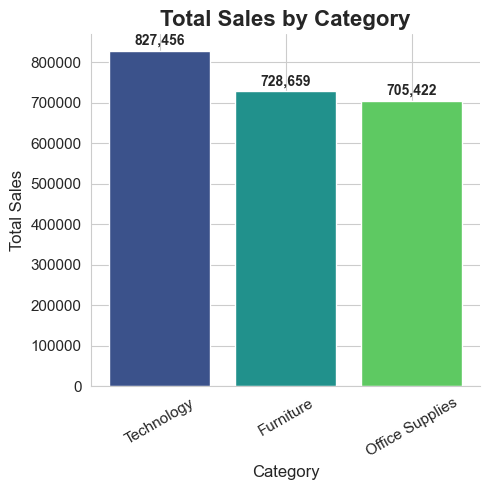

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

# Sort categories by Sales for better visual
sales_category = df.groupby("Category")["Sales"].sum().reset_index()
sales_category = sales_category.sort_values(by="Sales", ascending=False)

# Create a colorful bar chart
colors = sns.color_palette("viridis", len(sales_category))  # Viridis palette

bars = plt.bar(sales_category['Category'], sales_category['Sales'], color=colors)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Rotate x labels slightly for better readability
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

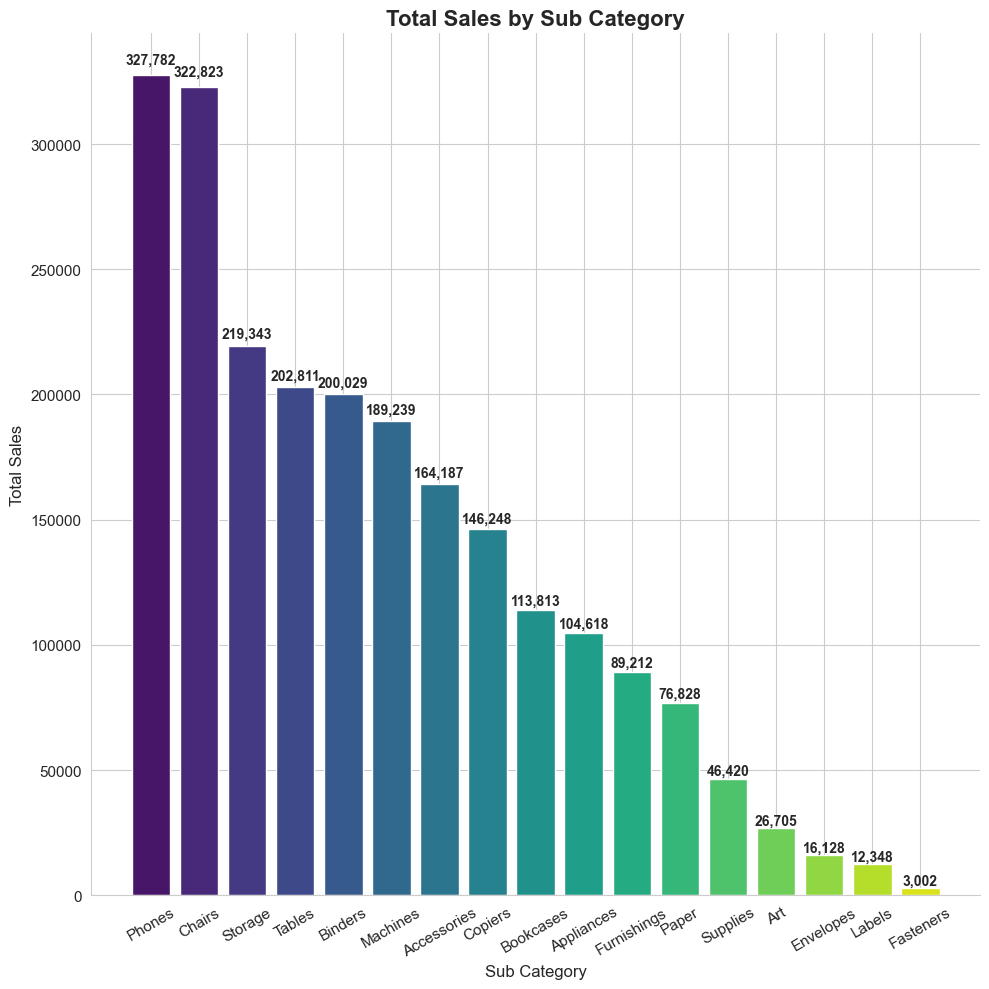

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))

# Sort categories by Sales for better visual
sales_subcategory = df.groupby("Sub-Category")["Sales"].sum().reset_index()
sales_subcategory = sales_subcategory.sort_values(by="Sales", ascending=False)

# Create a colorful bar chart
colors = sns.color_palette("viridis", len(sales_subcategory))  # Viridis palette

bars = plt.bar(sales_subcategory['Sub-Category'], sales_subcategory['Sales'], color=colors)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Total Sales by Sub Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Sub Category', fontsize=12)

# Rotate x labels slightly for better readability
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

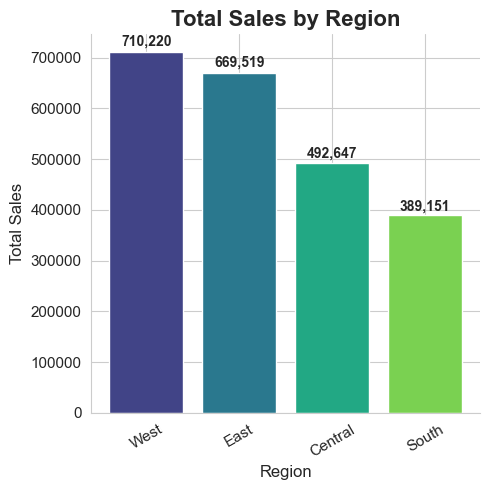

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

# Sort categories by Sales for better visual
sales_region = df.groupby("Region")["Sales"].sum().reset_index()
sales_region = sales_region.sort_values(by="Sales", ascending=False)

# Create a colorful bar chart
colors = sns.color_palette("viridis", len(sales_region))  # Viridis palette

bars = plt.bar(sales_region['Region'], sales_region['Sales'], color=colors)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Region', fontsize=12)

# Rotate x labels slightly for better readability
plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

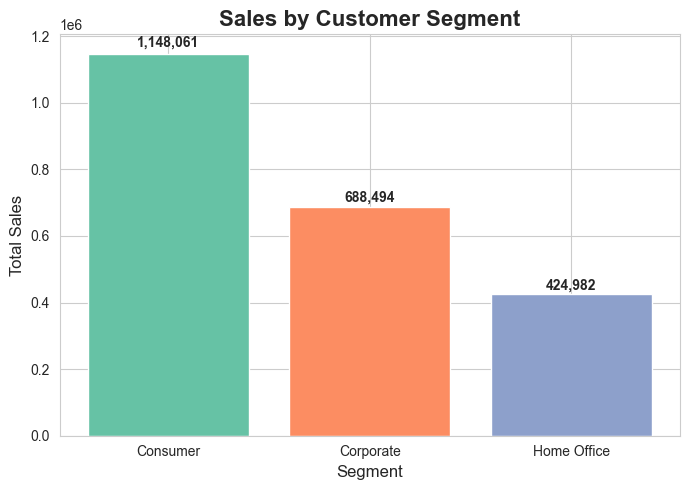

In [69]:
segment_sales = df.groupby("Segment")["Sales"].sum().reset_index()

segment_sales = segment_sales.sort_values(by="Sales", ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(7,5))

colors = sns.color_palette("Set2", len(segment_sales))
plt.bar(segment_sales['Segment'], segment_sales['Sales'], color=colors)

for i, value in enumerate(segment_sales['Sales']):
    plt.text(i, value + 0.01*value, f"{value:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Sales by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


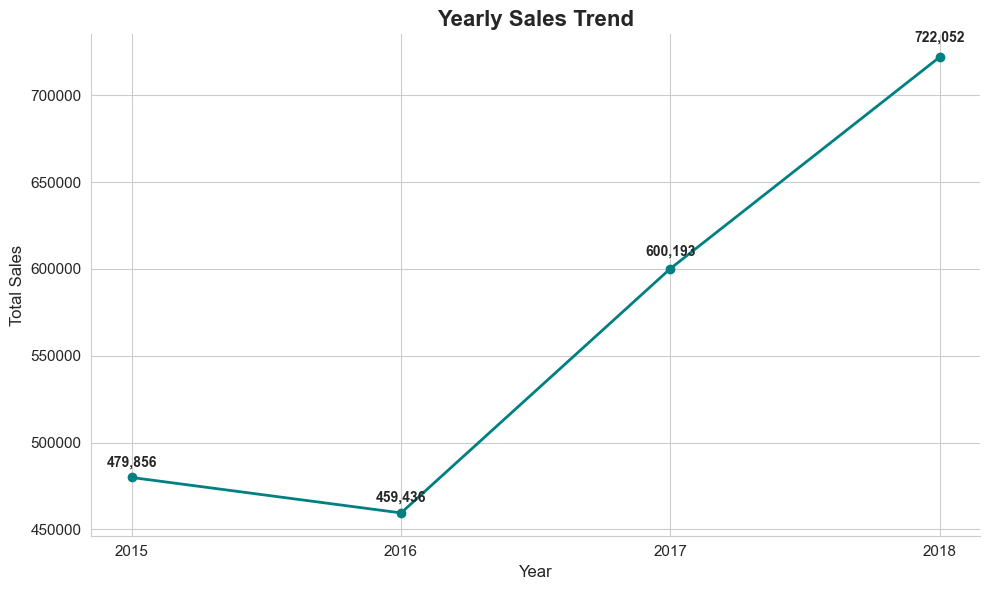

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# Aggregate sales per year
sales_yearly = df.groupby("Order Year")["Sales"].sum().reset_index()
sales_yearly = sales_yearly.sort_values(by="Order Year")

# Create line plot with markers
plt.plot(sales_yearly['Order Year'], sales_yearly['Sales'], marker='o', linestyle='-', color='teal', linewidth=2)

# Annotate each point with the sales value
for i, row in sales_yearly.iterrows():
    plt.text(row['Order Year'], row['Sales'] + 0.01*row['Sales'], f"{row['Sales']:,.0f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Yearly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Customize ticks
plt.xticks(sales_yearly['Order Year'], fontsize=11)
plt.yticks(fontsize=11)

# Optional: remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()


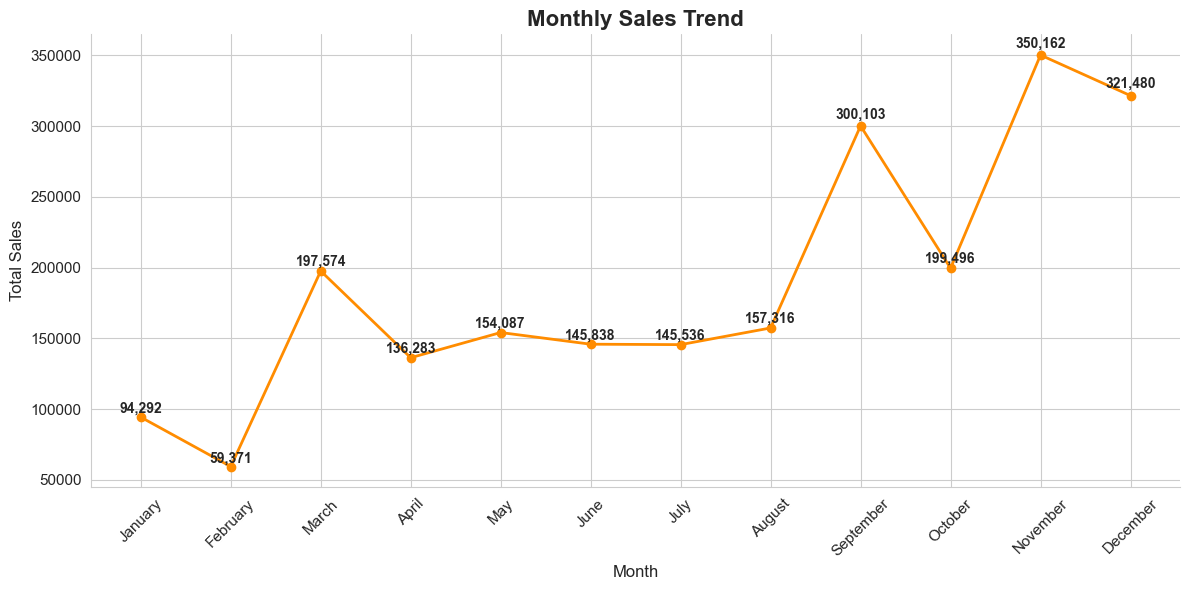

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Aggregate sales per month
sales_monthly = df.groupby("Order Month Name")["Sales"].sum().reset_index()

# Optional: sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sales_monthly['Order Month Name'] = pd.Categorical(sales_monthly['Order Month Name'], categories=month_order, ordered=True)
sales_monthly = sales_monthly.sort_values('Order Month Name')

# Create line plot with markers
plt.plot(sales_monthly['Order Month Name'], sales_monthly['Sales'], marker='o', linestyle='-', color='darkorange', linewidth=2)

# Annotate each point with sales value
for i, row in sales_monthly.iterrows():
    plt.text(row['Order Month Name'], row['Sales'] + 0.01*row['Sales'], f"{row['Sales']:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Customize ticks
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()


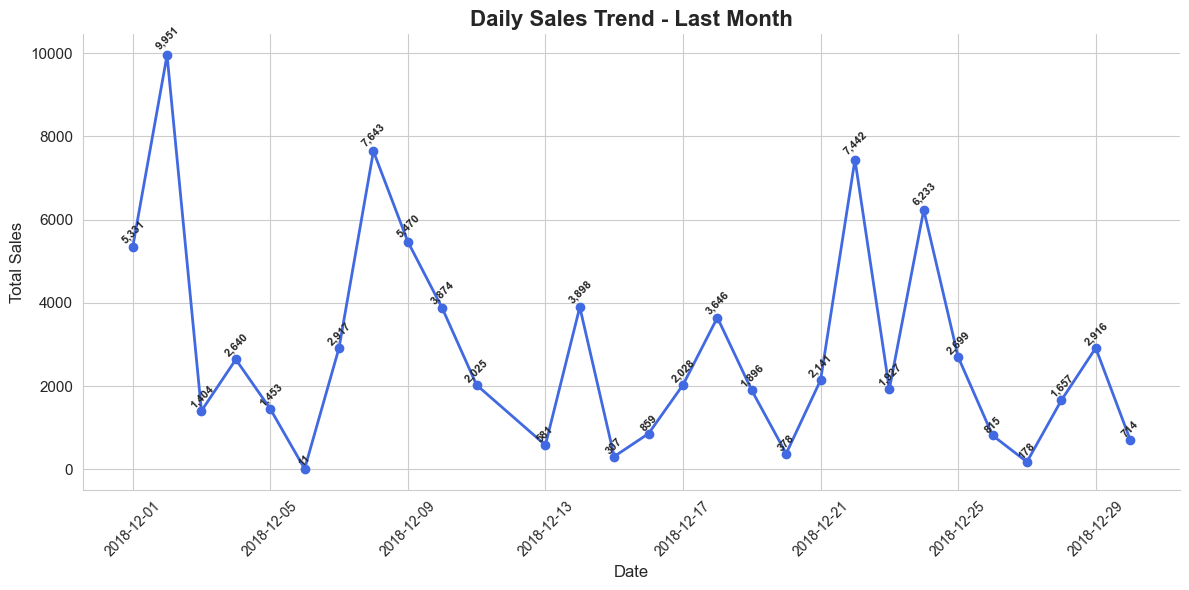

In [52]:

last_date = df['Order Date'].max()              # e.g., 2025-10-31
first_date_last_month = (last_date.replace(day=1))  # first day of last month

# Filter data for last month
df_last_month = df[(df['Order Date'] >= first_date_last_month) & (df['Order Date'] <= last_date)]

# Aggregate daily sales
sales_daily_last_month = df_last_month.groupby("Order Date")["Sales"].sum().reset_index()

# Sort by date
sales_daily_last_month = sales_daily_last_month.sort_values("Order Date")

# Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

# Line plot with markers
plt.plot(sales_daily_last_month['Order Date'], sales_daily_last_month['Sales'], 
         marker='o', linestyle='-', color='royalblue', linewidth=2)

# Annotate points
for i, row in sales_daily_last_month.iterrows():
    plt.text(row['Order Date'], row['Sales'] + 0.01*row['Sales'], f"{row['Sales']:,.0f}", 
             ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=45)

# Titles and labels
plt.title('Daily Sales Trend - Last Month', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()


TOP 10 PRODUCTS BY SALES

In [60]:
top_products = df.groupby("Product Name")["Sales"].sum().reset_index()

top_products = top_products.sort_values(by="Sales", ascending=False)

top_10_products = top_products.head(10)
print(top_10_products)


                                          Product Name      Sales
404              Canon imageCLASS 2200 Advanced Copier  61599.824
649  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480
785       HON 5400 Series Task Chairs for Big and Tall  21870.576
685         GBC DocuBind TL300 Electric Binding System  19823.479
687   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
804               Hewlett Packard LaserJet 3310 Copier  18839.686
786  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
682          GBC DocuBind P400 Electric Binding System  17965.068
812        High Speed Automatic Electric Letter Opener  17030.312


BOTTOM 10 PRODUCTS BY SALES

In [62]:
product_sales = df.groupby("Product Name")["Sales"].sum().reset_index()

bottom_products = product_sales.sort_values(by="Sales", ascending=True)
bottom_10_products = bottom_products.head(10)
print(bottom_10_products)


                                           Product Name  Sales
604   Eureka Disposable Bags for Sanitaire Vibra Gro...  1.624
208                                             Avery 5  5.760
1792                                           Xerox 20  6.480
783                                 Grip Seal Envelopes  7.072
97                    Acme Serrated Blade Letter Opener  7.632
253   Avery Hi-Liter Pen Style Six-Color Fluorescent...  7.700
249   Avery Hi-Liter Comfort Grip Fluorescent Highli...  7.800
1779                                         Xerox 1989  7.968
27                                    4009 Highlighters  8.040
1508                         Stockwell Gold Paper Clips  8.096


Top 3 Products by Order

In [64]:
product_orders = df.groupby("Product Name")["Order ID"].nunique().reset_index()

product_orders.rename(columns={"Order ID": "Number of Orders"}, inplace=True)

top_3_products = product_orders.sort_values(by="Number of Orders", ascending=False).head(3)

print(top_3_products)

           Product Name  Number of Orders
1492    Staple envelope                47
1498            Staples                46
537   Easy-staple paper                44


TOP 10 CUSTOMERS BY SALES

In [65]:
customer_sales = df.groupby("Customer Name")["Sales"].sum().reset_index()

top_10_customers = customer_sales.sort_values(by="Sales", ascending=False).head(10)

print(top_10_customers)


          Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


In [75]:
region_country_sales = df.groupby(["Region", "Country"])["Sales"].sum().reset_index()
print(region_country_sales)

    Region        Country        Sales
0  Central  United States  492646.9132
1     East  United States  669518.7260
2    South  United States  389151.4590
3     West  United States  710219.6845


ORDER FREQUENCY FOR CUSTOMER

In [ ]:
order_frequency = df.groupby("Customer Name")["Order ID"].nunique().reset_index()
order_frequency.rename(columns={"Order ID": "Number of Orders"}, inplace=True)

print(order_frequency.head())


     Customer Name  Number of Orders
0    Aaron Bergman                 3
1    Aaron Hawkins                 7
2   Aaron Smayling                 7
3  Adam Bellavance                 8
4        Adam Hart                10


REPEATED CUSTOMERS

In [ ]:
repeat_customers = order_frequency[order_frequency["Number of Orders"] > 1]

num_repeat_customers = repeat_customers.shape[0]
total_customers = order_frequency.shape[0]
repeat_percentage = (num_repeat_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Repeat Customers: {num_repeat_customers}")
print(f"Repeat Purchase Percentage: {repeat_percentage:.2f}%")


Total Customers: 793
Repeat Customers: 780
Repeat Purchase Percentage: 98.36%


Insights From the Dataset :
1) Total sales during the period: $2261536.78
2) Yearly trend: Sales increased rapidly over the last 2 years, with peak sales observed in Year 2018.
3) Monthly trend: Certain months like November–December show seasonal spikes, while January-febraury tend to be slow months.
4) Top products by sales: Canon imageCLASS 2200 Advanced Copier, Fellowes PB500 Electric Punch Plastic combo, Cisco TelePresence System EX90 Videoconference contributed the most revenue.
5) Bottom products by sales: Eureka Disposable Bags for Sanitaire Vibra, Avery 5  5.760, Xerox 20 consistently have low sales.
6) Category-wise analysis: Technology category drives the highest sales.Office Supplies and Furniture contribute moderate revenue.
7) Repeat Purchases : 98.36 % of constumers place multiple orders.
8) Customer segments: Consumer segment generates the most sales. Corporate show moderate contribution. Home Office shows lowest contribution.
9) Region-wise sales: West region leads in total sales, followed by East, Central, and South.
10) Sales show clear seasonal spikes during holiday months (Nov–Dec) and slowdowns in off-season months.

RECOMMENDATIONS :

1) Focus marketing, promotions, and inventory on top-selling products like Canon imageCLASS 2200 Advanced Copier, Fellowes PB500 Electric Punch Plastic combo, and Cisco TelePresence System EX90. Introduce bundle offers or upselling strategies for these high-demand items to maximize revenue.
2) Evaluate underperforming products such as Eureka Disposable Bags, Avery 5 5.760, and Xerox 20 to determine if they should be discontinued, discounted, or repositioned. Investigate if low sales are due to pricing, visibility, or lack of demand.
3) Technology drives the most sales → prioritize stock and marketing efforts in this category. Office Supplies and Furniture contribute moderately → analyze if promotions or product bundling can boost these categories.
4) With 98.36% of customers placing repeat orders, strengthen loyalty programs and targeted marketing campaigns for repeat buyers. Offer incentives for repeat purchases such as discounts, early access to new products, or subscription models.
5) Consumer segment generates most sales → create personalized offers and promotions for this group. Corporate segment shows moderate contribution → consider corporate bundles, bulk discounts, or B2B-focused campaigns. Home Office segment is underperforming → investigate potential product-market fit and marketing strategy.
6) West region leads in sales → maintain strong distribution and marketing in this region. For East, Central, and South, identify top-performing cities or markets and implement targeted promotions to boost revenue.
7) Capitalize on holiday spikes (Nov–Dec) → increase inventory, marketing campaigns, and promotions ahead of peak months. Mitigate off-season slowdowns (Jan–Feb) → introduce sales, discounts, or loyalty campaigns to maintain engagement and revenue.
8) Align inventory levels with seasonal demand patterns and product popularity to reduce overstock or stockouts. Prioritize fast-moving products and adjust procurement for slower-moving items.
